Named Entity Recognition with spaCy & roBERTa

Documentation: https://spacy.io/models/en#en_core_web_trf

<div style="color:white">

- **Description**: This technique will give insights into the frequency of named entities in the articles that fall into a specific topic.
- **Purpose**: it gives the understanding that entity-based approach to sentiment analysis will be the most beneficial for the project
- **Deployment**: The Sentiment Analysis will be performed on sentences containing both direct and indirect references to pre-selected entities. These sentences will be extracted and separated from the rest of the article body for focused analysis. The analysis will differentiate between explicit and implicit mentions of the entities, ensuring that indirect references (e.g., pronouns or related phrases) are also considered. After analyzing the sentiment of these sentences, the tone of the entire article will be adjusted accordingly. Specifically, sentences with mentions of these entities will be categorized and toned based on their sentiment—positive, negative, or neutral. This refined approach ensures that the overall sentiment of the article reflects the impact of these key entities while maintaining contextual integrity.

<div>

Named Entity Types in en_core_web_trf

<span style="font-size: 10px;">

    PERSON ('PERSON'): People, including fictional characters, and sometimes groups of people.
    NORP ('NORP'): Nationalities or religious/political groups.
    FAC ('FAC'): Buildings, airports, highways, bridges, etc.
    ORG ('ORG'): Organizations, including companies, institutions, and governmental bodies.
    GPE ('GPE'): Geopolitical entities (countries, cities, states).
    LOC ('LOC'): Non-GPE locations, mountain ranges, bodies of water, etc.
    PRODUCT ('PRODUCT'): Products, including software, vehicles, gadgets, etc.
    EVENT ('EVENT'): Named events, including sports events, festivals, wars, and other events.
    WORK_OF_ART ('WORK_OF_ART'): Titles of books, movies, paintings, etc.
    LAW ('LAW'): Laws, regulations, rules, and legal documents.
    LANGUAGE ('LANGUAGE'): Languages.
    DATE ('DATE'): Absolute or relative dates or periods.
    TIME ('TIME'): Times within a day.
    PERCENT ('PERCENT'): Percentage values.
    MONEY ('MONEY'): Monetary values, including unit currencies.
    QUANTITY ('QUANTITY'): Measurements of physical quantities.
    ORDINAL ('ORDINAL'): Ordinal numbers.
    CARDINAL ('CARDINAL'): Non-ordinal numbers.
</span>

In [34]:
import spacy
from spacy import displacy
import pandas as pd
from collections import Counter 
import matplotlib.pyplot as plt

# local imports

# Settings
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# Download the model
trf = spacy.load('en_core_web_trf') # python -m spacy download en_core_web_trf
                                    # pip install -U spacy
                                    # pip install -U spacy-transformers

In [36]:
# Load the data
df = pd.read_csv('../data/topics_summaries.csv')
df.head()

,body,title,category,word_count,topic,article_summary,gemini_summary,topic_label
0,"The ""best person for the job"" should be appoin...",'Best person' for top legal job,politics,465,7,"Christopher Leslie tells MPs the ""best person ...",The UK government is pushing for reforms to th...,**UK Legal & Political Reform**
1,A cap on donations to political parties should...,'Debate needed' on donations cap,politics,549,4,The Electoral Commission says it is worth deba...,The Electoral Commission has advised against i...,**UK Politics & Aid**
2,It could cost £80m to run a UK referendum on t...,'EU referendum could cost £80m',politics,194,6,Constitution would make the European Union wor...,A UK referendum on the European constitution i...,UK and the EU
3,The risk of pets and children being given vote...,'Fido' to be taken off vote lists,politics,510,0,Electoral Commission says having voters regist...,The UK Electoral Commission is proposing a shi...,**UK Politics & Elections**
4,"People in England, Scotland and Wales must hav...",'Last chance' warning for voters,politics,270,0,Those who filled in forms last autumn should a...,The deadline to register to vote in the upcomi...,**UK Politics & Elections**


In [37]:
# Create the function to return a list of entities
def get_entities(text):
    # process the text with a SpaCy model to get named entities
    doc = trf(text)
    # initialize list to store identified organizations
    org_list = []
    people_list = []
    norp_list = []
    # loop through the identified entities and append entities to lists
    for entity in doc.ents:
        if entity.label_ == 'ORG':
            org_list.append(entity.text)
        elif entity.label_ == 'PERSON':
            people_list.append(entity.text)
    
    return org_list, people_list

In [38]:
# Fetching entities
df[['ORG', 'people']] = df['body'].apply(lambda x: pd.Series(get_entities(x)))

In [39]:
df.head()

,body,title,category,word_count,topic,article_summary,gemini_summary,topic_label,ORG,people
0,"The ""best person for the job"" should be appoin...",'Best person' for top legal job,politics,465,7,"Christopher Leslie tells MPs the ""best person ...",The UK government is pushing for reforms to th...,**UK Legal & Political Reform**,"[Health, the House of Lords, the House of Comm...","[Christopher Leslie, Leslie, Lord Falconer, Le..."
1,A cap on donations to political parties should...,'Debate needed' on donations cap,politics,549,4,The Electoral Commission says it is worth deba...,The Electoral Commission has advised against i...,**UK Politics & Aid**,"[the Electoral Commission, the House of Common...",[Sam Younger]
2,It could cost £80m to run a UK referendum on t...,'EU referendum could cost £80m',politics,194,6,Constitution would make the European Union wor...,A UK referendum on the European constitution i...,UK and the EU,"[Constitutional Affairs, the European Union, L...","[Chris Leslie, Leslie, John Cryer, Jack Straw]"
3,The risk of pets and children being given vote...,'Fido' to be taken off vote lists,politics,510,0,Electoral Commission says having voters regist...,The UK Electoral Commission is proposing a shi...,**UK Politics & Elections**,"[The Electoral Commission, The Electoral Commi...","[Sam Younger, Younger, Younger, Younger, Younger]"
4,"People in England, Scotland and Wales must hav...",'Last chance' warning for voters,politics,270,0,Those who filled in forms last autumn should a...,The deadline to register to vote in the upcomi...,**UK Politics & Elections**,"[Preston City Council, Electoral Commission]",[]


In [40]:
# Check a single document for an entity
print(df['people'].iloc[0])

['Christopher Leslie', 'Leslie', 'Lord Falconer', 'Leslie', 'Dominic Grieve', 'Grieve', 'Douglas Hogg']


In [41]:
# Convert each entity column into lists / merge organizations column into one big list
org_list = df['ORG'].to_list()
people_list = df['people'].to_list()

# Flatten the lists (combine all rows into one list per entity type)
org_list = [org for sublist in org_list for org in sublist]
people_list = [person for sublist in people_list for person in sublist]

In [42]:
# Create dictionary of entity mention frequency and calculate frequencies of selected entities
org_freq = Counter(org_list)
org_freq.most_common(30)

[('Labour', 360),
 ('EU', 111),
 ('UKIP', 73),
 ('Commons', 64),
 ('BBC', 47),
 ('Parliament', 41),
 ('Cabinet', 40),
 ('BBC News', 39),
 ("BBC Radio 4's", 32),
 ('the House of Lords', 30),
 ('Tory', 30),
 ('Lords', 26),
 ('Treasury', 25),
 ('G8', 24),
 ('New Labour', 23),
 ('Budget', 20),
 ('Home', 15),
 ('The Liberal Democrats', 15),
 ('the Liberal Democrats', 14),
 ('Unison', 14),
 ('the Labour Party', 14),
 ('Westminster', 13),
 ('TPS', 13),
 ('the Lib Dems', 13),
 ('Amicus', 12),
 ('UN', 12),
 ('the House of Commons', 11),
 ('Labour Party', 11),
 ('The Lib Dems', 11),
 ('the Electoral Commission', 10)]

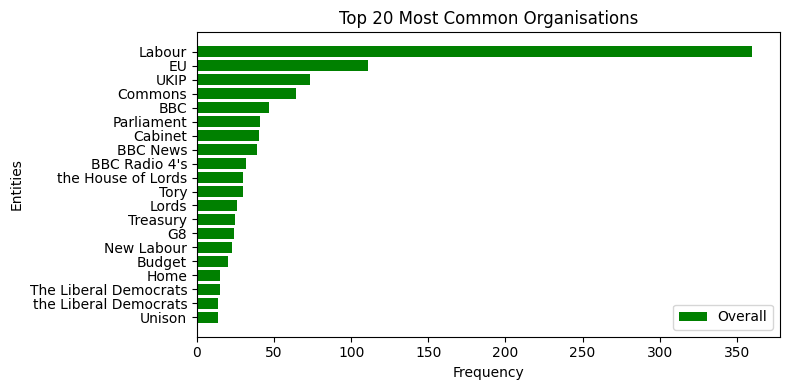

In [43]:
# Visualize entity frequencies
common_orgs = org_freq.most_common(20)
org_names, org_counts = zip(*common_orgs)
plt.figure(figsize=(8, 4))
plt.barh(org_names, org_counts, color='green', label='Overall')
plt.xlabel('Frequency')
plt.ylabel('Entities')
plt.title('Top 20 Most Common Organisations')
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
# Create dictionary of entity mention frequency and calculate frequencies of selected entities
people_freq = Counter(people_list)
people_freq.most_common(30)

[('Blair', 239),
 ('Brown', 221),
 ('Tony Blair', 116),
 ('Howard', 86),
 ('Gordon Brown', 80),
 ('Kennedy', 63),
 ('Michael Howard', 62),
 ('Straw', 43),
 ('Charles Kennedy', 39),
 ('Kilroy-Silk', 38),
 ('Clarke', 31),
 ('Milburn', 30),
 ('Jack Straw', 25),
 ('Alan Milburn', 23),
 ('Falconer', 19),
 ('Charles Clarke', 18),
 ('Prescott', 18),
 ('Bush', 17),
 ('Houston', 17),
 ('Oliver Letwin', 15),
 ('Fox', 15),
 ('Mubanga', 15),
 ('Kelly', 14),
 ('David Davis', 14),
 ('John Prescott', 14),
 ('Peston', 13),
 ('McConnell', 13),
 ('Liam Fox', 12),
 ('Cable', 12),
 ('Mark Oaten', 11)]

Note: the most frequent PERSON entitiy is Tony Blair, the leader of the Labour party which is also the most frequent as ORG entity

In [45]:
# Combine frequencies into a DataFrame
entity_freq_df = pd.DataFrame({
    'ORG': pd.Series(org_freq),
    'PERSON': pd.Series(people_freq)
}).fillna(0)  # Fill NaN values with 0

In [46]:
# Sum up frequencies per document (row) to get the general number of entities per document
entity_counts_per_doc = df[['ORG', 'people']].applymap(len).sum(axis=1)

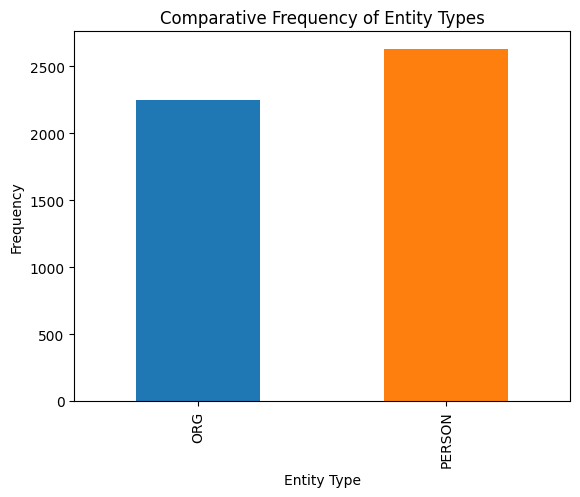

In [47]:
# Plotting entity frequency per entity type
entity_freq_df.sum().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Comparative Frequency of Entity Types")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.show()

In [48]:
def filter_rows_with_entity(df, entity_column='people', target_entities=None):
    """
    Filters a DataFrame to include only rows where the entity_column contains
    any of the target_entities (supports partial matching in lists).
    
    Parameters:
    ----------
    df : pd.DataFrame
        DataFrame containing a column with list of entities.
    entity_column : str
        Column name containing lists of named entities.
    target_entities : list
        List of strings to match (e.g., ['Tony', 'Blair', 'Tony Blair']).
        
    Returns:
    -------
    pd.DataFrame
        Filtered DataFrame with only rows that include any target entity.
    """
    if target_entities is None:
        target_entities = ['Tony', 'Blair', 'Tony Blair']

    def contains_target(entity_list):
        if not isinstance(entity_list, list):
            return False
        return any(any(name in person for name in target_entities) for person in entity_list)

    return df[df[entity_column].apply(contains_target)].copy()


In [49]:
filtered_df = filter_rows_with_entity(df, entity_column='people', target_entities=['Tony', 'Blair', 'Tony Blair'])
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 5 to 282
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   body             120 non-null    object
 1   title            120 non-null    object
 2   category         120 non-null    object
 3   word_count       120 non-null    int64 
 4   topic            120 non-null    int64 
 5   article_summary  120 non-null    object
 6   gemini_summary   120 non-null    object
 7   topic_label      120 non-null    object
 8   ORG              120 non-null    object
 9   people           120 non-null    object
dtypes: int64(2), object(8)
memory usage: 10.3+ KB


In [50]:
filtered_df['people'].iloc[0]

['John Bourn',
 'John',
 'Tony Blair',
 'Ivan Lewis',
 'Tim Collins',
 'Phil Willis']

In [51]:
import pandas as pd
import spacy
from spacy.tokens import Span

# Load spaCy's transformer-based model
nlp = spacy.load("en_core_web_trf")

# Function to detect indirect mentions of the entity and resolve them
def resolve_pronouns(text, entity_variations):
    """
    Resolves indirect mentions of the specified entities (e.g., Tony Blair, he, him).
    
    Parameters:
    text (str): The article body text to process.
    entity_variations (list): A list of entity names and their variations (e.g., ['Tony', 'Blair', 'Tony Blair']).
    
    Returns:
    list: A list of sentences with direct and indirect mentions resolved.
    """
    # Process the text
    doc = nlp(text)
    
    # Create a dictionary of pronouns and their replacements
    pronoun_map = {
        "he": entity_variations[0],  # Assuming first variation is preferred
        "him": entity_variations[0],
        "his": entity_variations[0] + "'s",
        "he's": entity_variations[0] + "'s"
    }
    
    resolved_sentences = []
    
    # Iterate through sentences and replace pronouns
    for sent in doc.sents:
        sentence_resolved = []
        
        for token in sent:
            # Replace pronouns with the first variation of the entity
            if token.text.lower() in pronoun_map:
                sentence_resolved.append(pronoun_map[token.text.lower()])
            else:
                sentence_resolved.append(token.text)
        
        resolved_sentences.append(" ".join(sentence_resolved))
    
    return resolved_sentences

# Function to apply to each row of the DataFrame
def extract_sentences_with_mentions(df, entity_variations):
    """
    Extract sentences with direct and indirect mentions of the entities and store them in a new column 'sentences'.
    
    Parameters:
    df (DataFrame): The DataFrame containing articles and entities.
    entity_variations (list): List of variations of the entity (e.g., ['Tony', 'Blair', 'Tony Blair']).
    
    Returns:
    DataFrame: The updated DataFrame with a new 'sentences' column.
    """
    sentences_list = []
    
    for _, row in df.iterrows():
        text = row['body']  # Assuming the article content is in the 'body' column
        resolved_sentences = resolve_pronouns(text, entity_variations)
        
        # Filter sentences that contain direct or indirect mentions of the entity
        entity_mentions = [sent for sent in resolved_sentences if any(entity in sent for entity in entity_variations)]
        
        # Add the filtered sentences to the list
        sentences_list.append(" ".join(entity_mentions))  # Joining sentences if multiple are found
    
    # Now assign the list of sentences to the 'sentences' column in the DataFrame
    df['sentences'] = sentences_list
    
    return df


In [ ]:
# Define the entity variations you want to track
entity_variations_tony = ['Tony Blair', 'Blair', 'Tony']

# Apply the function to extract sentences
filtered_df = extract_sentences_with_mentions(filtered_df, entity_variations_tony)

# Output the updated DataFrame
filtered_df[['body', 'sentences']]

In [53]:
filtered_df.head()

,body,title,category,word_count,topic,article_summary,gemini_summary,topic_label,ORG,people,sentences
5,The government will only hit its target for im...,'More to do' on adult literacy,politics,568,0,National Audit Office praises ministers for re...,A National Audit Office report praises the gov...,**UK Politics & Elections**,"[The National Audit Office, The Department for...","[John Bourn, John, Tony Blair, Ivan Lewis, Tim...",When the government announced it had reached i...
13,Palestinian leader Mahmoud Abbas has said he w...,Abbas 'will not tolerate' attacks,politics,388,2,Mahmoud Abbas says he will not tolerate attack...,Mahmoud Abbas condemned the Tel Aviv suicide b...,**Tony Blair's Election**,"[The Palestinian Authority, PA, PA, the Indepe...","[Mahmoud Abbas, Abbas, Abbas, Abbas, Jack Stra...",Palestinian leader Mahmoud Abbas has said Tony...
14,Tony Blair does not believe abortion should be...,Abortion not a poll issue - Blair,politics,640,3,Tory leader backs a reduction in the legal lim...,Tony Blair believes abortion should not be an ...,**UK Election News**,"[Labour, Labour, The Family Planning Associati...","[Tony Blair, Blair, Michael Howard's, Blair, C...",Tony Blair does not believe abortion should be...
17,"He called it his ""masochism strategy"" in the r...","Analysis: No pain, no gain?",politics,988,2,Tony Blair's latest bout of flagellation came ...,Facing accusations of being out of touch and o...,**Tony Blair's Election**,"[Labour, Five, Labour, Number 10, Labour, Nati...","[Tony Blair, Blair, Tony Blair, Blair, Wright,...","Tony Blair called it Tony Blair's "" masochism ..."
19,Plans to allow Home Secretary Charles Clarke t...,Anti-terror plan faces first test,politics,643,1,"Tories, Lib Dems and some Labour MPs are poise...",Home Secretary Charles Clarke's plan to allow ...,**UK Anti-Terrorism Measures**,"[Home, Parliament, Tories, Labour, Commons, th...","[Charles Clarke, Clarke, David Davis, Tony Bla...",Tory shadow home secretary David Davis warned ...


In [61]:
filtered_df['sentences'].iloc[2]

'Tony Blair does not believe abortion should be an election issue , arguing it is a matter for individual conscience . The prime minister \'s spokesman set out Mr Blair \'s view after the top Catholic in England and Wales backed Michael Howard \'s stance on abortions . The prime minister has made it clear Tony Blair has no plans to the change the law .    Mr Blair \'s spokesman said : " The Catholic church has a well - known position on this issue and it was one of many issues the Cardinal mentioned and therefore it should be seen in that context . " Tony Blair\'s words came as Cardinal Cormac Murphy O\'Connor , the Archbishop of Westminster , backed Mr Howard \'s stance and distanced himself from Labour . In a statement , Tony Blair said abortion was a " very key issue " , saying : " The policy supported by Mr Howard is one that we would commend , on the way to a full abandonment of abortion . " Cardinal O\'Connor claimed Labour had " developed " the notion that it was the natural par

In [ ]:
# Clean the DataFrame for sentiment analysis

# Clean the topic_label column by removing the asterisks and other unwanted characters
filtered_df['topic_label'] = filtered_df['topic_label'].str.replace(r'\*\*', '', regex=True)  # Remove asterisks
filtered_df['topic_label'] = filtered_df['topic_label'].str.replace(r'[^a-zA-Z0-9\s&]', '', regex=True)  # Remove any special characters, except spaces and '&'
# Clean tge sentences column by removing unwanted characters
filtered_df['sentences'] = filtered_df['sentences'].str.replace(r'\n', ' ', regex=True)
# Drop columns that are not needed
filtered_df = filtered_df.drop(['category', 'word_count', 'people', 'ORG'], axis=1)

In [63]:
filtered_df.head()

,body,title,topic,article_summary,gemini_summary,topic_label,sentences
5,The government will only hit its target for im...,'More to do' on adult literacy,0,National Audit Office praises ministers for re...,A National Audit Office report praises the gov...,UK Politics & Elections,When the government announced it had reached i...
13,Palestinian leader Mahmoud Abbas has said he w...,Abbas 'will not tolerate' attacks,2,Mahmoud Abbas says he will not tolerate attack...,Mahmoud Abbas condemned the Tel Aviv suicide b...,Tony Blairs Election,Palestinian leader Mahmoud Abbas has said Tony...
14,Tony Blair does not believe abortion should be...,Abortion not a poll issue - Blair,3,Tory leader backs a reduction in the legal lim...,Tony Blair believes abortion should not be an ...,UK Election News,Tony Blair does not believe abortion should be...
17,"He called it his ""masochism strategy"" in the r...","Analysis: No pain, no gain?",2,Tony Blair's latest bout of flagellation came ...,Facing accusations of being out of touch and o...,Tony Blairs Election,"Tony Blair called it Tony Blair's "" masochism ..."
19,Plans to allow Home Secretary Charles Clarke t...,Anti-terror plan faces first test,1,"Tories, Lib Dems and some Labour MPs are poise...",Home Secretary Charles Clarke's plan to allow ...,UK AntiTerrorism Measures,Tory shadow home secretary David Davis warned ...


In [64]:
filtered_df.to_csv('../data/filtered_sentences.csv', index=False)